### Description:

In this notebook, we will compute the IOU for the Yolo nas default and predicted.......

In [ ]:
### run only once a
#pip install -q super-gradients==3.1.1
# pip install torchinfo
####

In [1]:
import os
from ultralytics import NAS
os.chdir("..")
ROOT = os.getcwd()
print(ROOT)


/Users/mautushid/github/Cowsformer


In [2]:
from ultralytics import NAS
from iou_utils_NAS import *
import warnings
warnings.filterwarnings("ignore")


The console stream is logged into /Users/mautushid/sg_logs/console.log


[2023-08-18 00:07:40] INFO - crash_tips_setup.py - Crash tips is enabled. You can set your environment variable to CRASH_HANDLER=FALSE to disable it
[2023-08-18 00:07:42] WARNING - redirects.py - NOTE: Redirects are currently not supported in Windows or MacOs.
[2023-08-18 00:07:47] WARNING - __init__.py - Failed to import pytorch_quantization
[2023-08-18 00:07:47] WARNING - calibrator.py - Failed to import pytorch_quantization
[2023-08-18 00:07:47] WARNING - export.py - Failed to import pytorch_quantization
[2023-08-18 00:07:47] WARNING - selective_quantization_utils.py - Failed to import pytorch_quantization
[2023-08-18 00:07:47] WARNING - env_sanity_check.py - Failed to verify operating system: Deci officially supports only Linux kernels. Some features may not work as expected.


In [3]:
### Dataset Directory
#data_directory = '/Users/mautushid/github/Yolo_Nas/cow_test-1'
data_directory = '/Users/mautushid/github/Cowsformer/data'

dataset_params['data_dir'] = data_directory

In [ ]:
''' 
from torchinfo import summary

summary(model=yolo_nas_l,
        input_size=(16, 3, 640, 640),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
        )
'''

In [4]:

### Loading ground truth data (bounding box information)
test_images = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/test/images"
test_labels = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/test/labels"

### defining prediction output directory 
#output_dir_default = "/Users/mautushid/github/Yolo_Nas/predicted_test/predicted_test_default"
#output_dir_fintuned = "/Users/mautushid/github/Yolo_Nas/predicted_test/predicted_test_finetuned"

### Load the model (default Yolo_Nas_L)
yolo_nas_l = models.get("yolo_nas_l", pretrained_weights="coco")

### Loading model (after fine-tuning)
model_path = "/Users/mautushid/github/Cowsformer/n200_yolo_na_i1_trial100/ckpt_best.pth"
#best_model = models.get('yolo_nas_l',num_classes=len(dataset_params['classes']),checkpoint_path=model_path)
best_model = models.get('yolo_nas_l', num_classes=80, checkpoint_path=model_path)
#best_model = NAS(model_path)




[2023-08-18 00:07:48] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.
[2023-08-18 00:07:50] INFO - checkpoint_utils.py - Successfully loaded model weights from /Users/mautushid/github/Cowsformer/n200_yolo_na_i1_trial100/ckpt_best.pth EMA checkpoint.


In [ ]:
### making predictions for default model
#predicted_image_list_default = show_predicted_images_from_dir(yolo_nas_l, test_images, conf = 0.6)

In [ ]:
### making predictions for finetuned model
#predicted_image_list_finetuned = show_predicted_images_from_dir(best_model, test_images, conf = 0.60)

In [ ]:
'''
#################### for test data #######################
import os
import shutil

# Set your root directory path
root_dir = "/Users/mautushid/github/cowsformer/data/cow200/yolov5"

# Source directories
source_img_dir = os.path.join(root_dir, 'images')
source_lbl_dir = os.path.join(root_dir, 'labels')

# Create target directories if they don't exist
test_target_dir = os.path.join(root_dir, 'test')
val_target_dir = os.path.join(root_dir, 'val')

if not os.path.exists(test_target_dir):
    os.makedirs(test_target_dir)
    os.makedirs(os.path.join(test_target_dir, 'images'))
    os.makedirs(os.path.join(test_target_dir, 'labels'))

if not os.path.exists(val_target_dir):
    os.makedirs(val_target_dir)
    os.makedirs(os.path.join(val_target_dir, 'images'))
    os.makedirs(os.path.join(val_target_dir, 'labels'))


def copy_data(txt_path, target_img_dir, target_lbl_dir):
    with open(txt_path, 'r') as file:
        for line in file:
            img_name = line.strip().split('/')[-1]
            lbl_name = img_name.replace('.jpg', '.txt')

            # Copy image
            shutil.copy(os.path.join(source_img_dir, img_name), target_img_dir)
            # Copy label
            shutil.copy(os.path.join(source_lbl_dir, lbl_name), target_lbl_dir)


# Copy data for test
copy_data(os.path.join(root_dir, 'test.txt'), os.path.join(
    test_target_dir, 'images'), os.path.join(test_target_dir, 'labels'))

# Copy data for val
copy_data(os.path.join(root_dir, 'val.txt'), os.path.join(
    val_target_dir, 'images'), os.path.join(val_target_dir, 'labels'))
'''

### Get bounding boxes of the predicted images

img_11


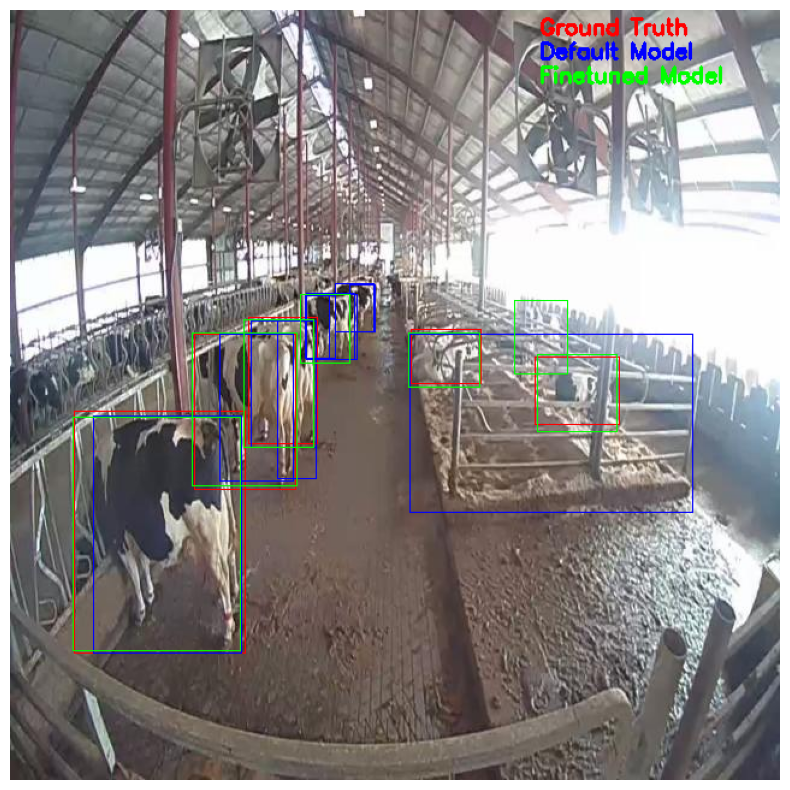

img_13


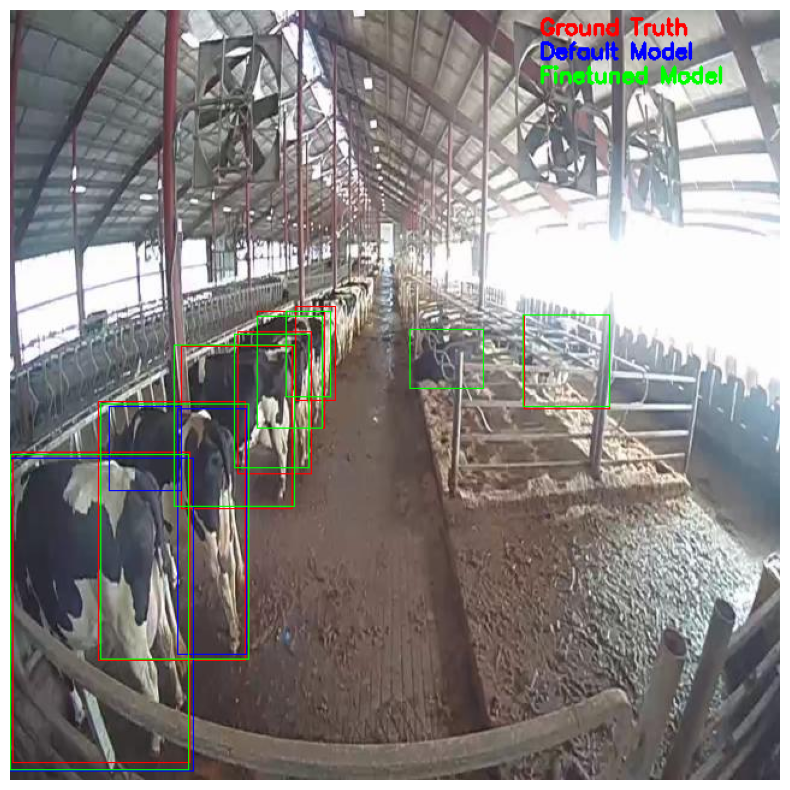

img_1_13


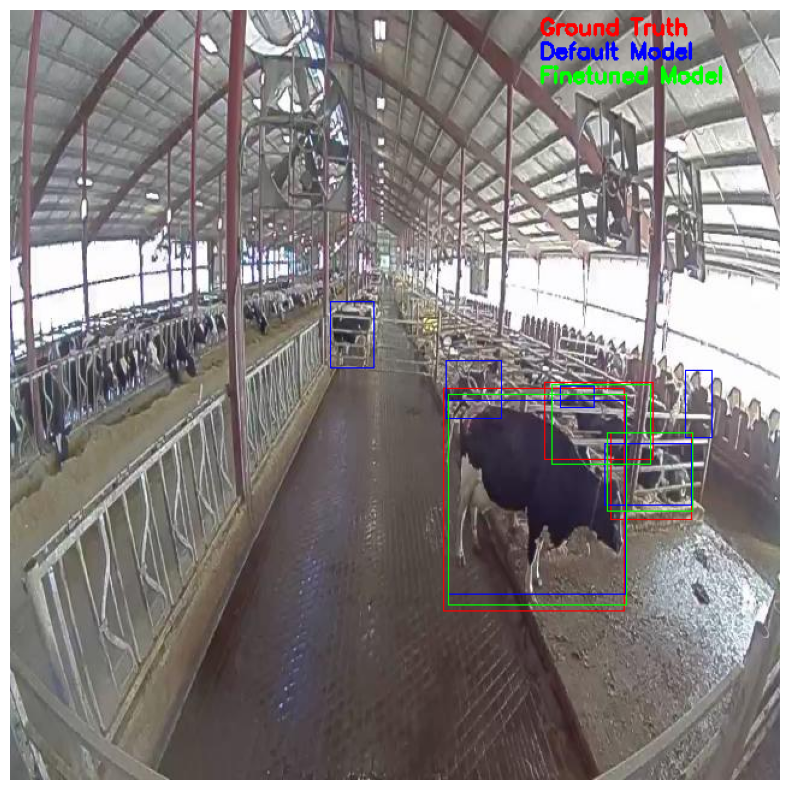

img_1_18


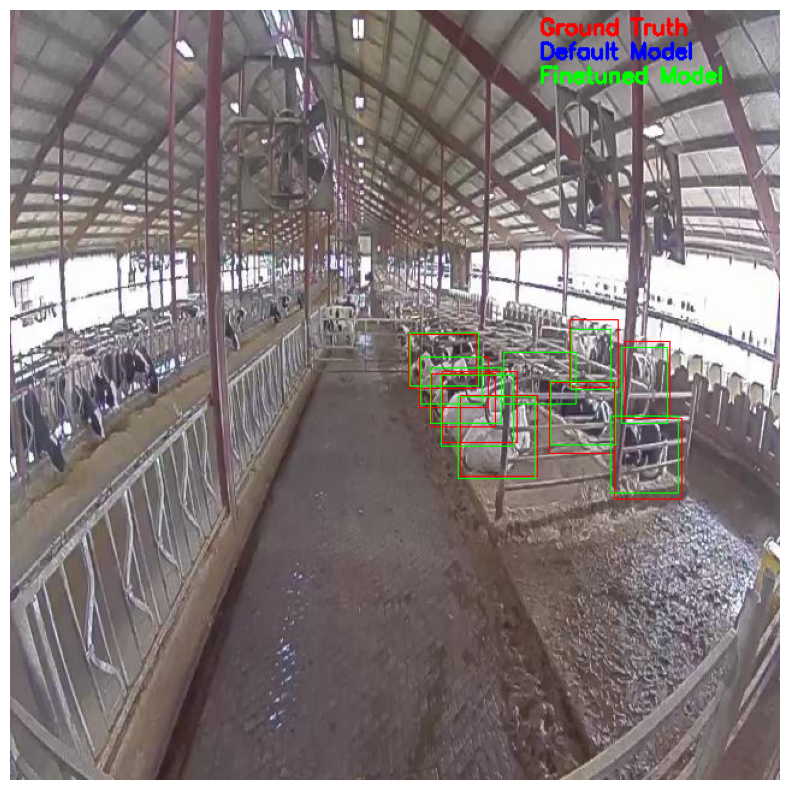

img_1_1


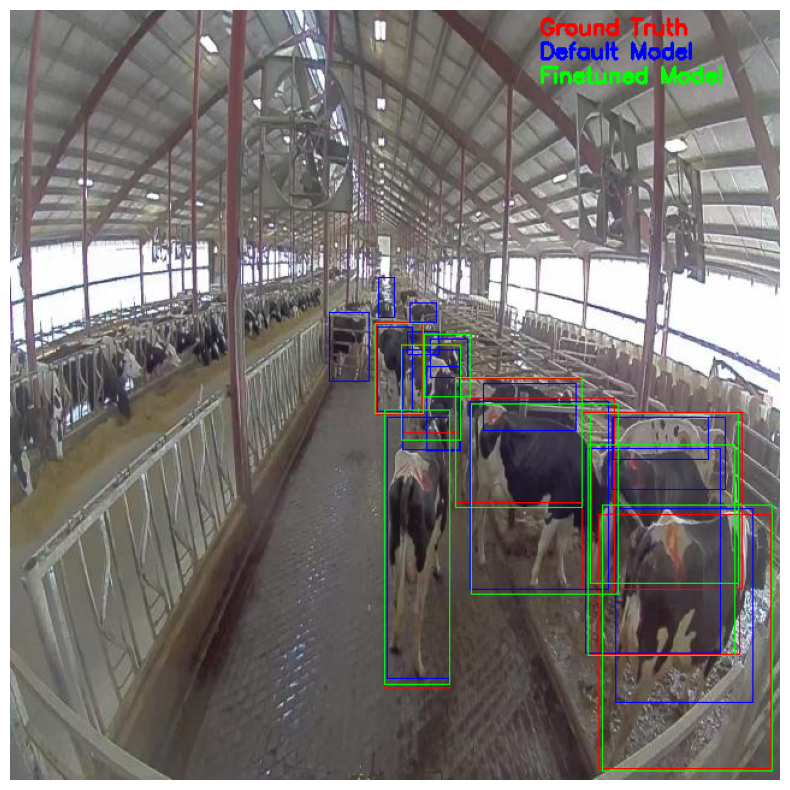

In [21]:
image_files = sorted(list(Path(test_images).rglob("*.jpg")))
label_files = sorted(list(Path(test_labels).rglob("*.txt")))
default_model = yolo_nas_l
finetuned_model = best_model 
iou_dicts = []
for i in range(5):  # len(image_files)
    test_image_path = str(image_files[i])
    test_image_label = str(label_files[i])
    prediction_dict = get_boxex_for_all_models(test_image_path,test_image_label,default_model,finetuned_model, conf = 0.6)
    print(prediction_dict['image'])
    iou_dicts.append(compute_iou_for_all_models(prediction_dict))
    draw_boxes_all_models(test_image_path, prediction_dict)
    

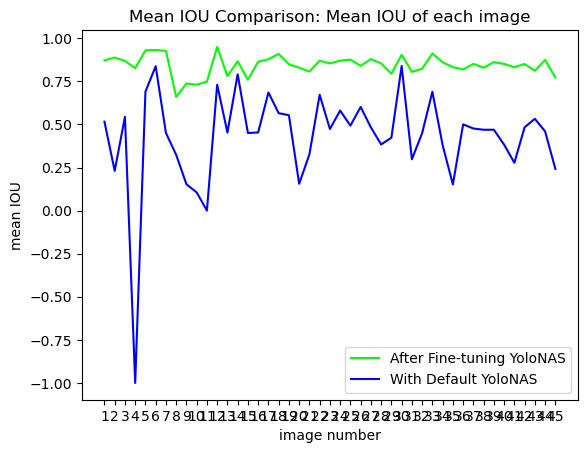

In [20]:
### Compute mean_IoU for both models for all images

x = list(range(1, len(iou_dicts)+1))
y1 = [np.mean(iou_dicts[i]['IOU_with_finetuned_YoloNAS'])for i in range(len(iou_dicts))]
y2 = [np.mean(iou_dicts[i]['IOU_with_default_YoloNAS']) for i in range(len(iou_dicts))]

# Plot the first dictionary in blue and the second in red
plt.plot(x, y1, color='lime', label='After Fine-tuning YoloNAS')
plt.plot(x, y2, color='blue', label='With Default YoloNAS')

# Add labels and title to the plot
plt.legend()

plt.xlabel('image number')
plt.ylabel('mean IOU')
plt.title('Mean IOU Comparison: Mean IOU of each image')
plt.xticks(range(1, len(iou_dicts) + 1))
# Show the plot
plt.show()


In [ ]:
from pathlib import Path

# Path to your directory containing test images
dir_path = "/Users/mautushid/github/Cowsformer/data/cow200/yolov5/test/images"

# List all image files in the directory
# Assuming all your images are in jpg format
image_files = list(Path(dir_path).rglob("*.jpg"))

# Dictionary to store results
predicted_boxes_all = {}

# Loop over all images and get predicted bounding boxes
for image_file in image_files:
    image_path = str(image_file)
    predicted_boxes = get_boxes_xyxy(best_model, image_path)
    predicted_boxes_all[image_path] = predicted_boxes

# Print out the results
for img_path, boxes in predicted_boxes_all.items():
    print(f"Image: {img_path}")
    print(f"Bounding Boxes: {boxes}\n")


In [5]:
import pandas as pd
'''
def labels_to_dataframe(labels_dir):
    # List all .txt files in the directory
    label_files = [f for f in os.listdir(labels_dir) if f.endswith('.txt')]

    # Create lists to store the tag and bounding box info
    tags = []
    bbox_info = []

    for file in label_files:
        # Extract the filename without extension as tag
        tag = os.path.splitext(file)[0]
        tags.append(tag)

        # Read bounding boxes from the file
        with open(os.path.join(labels_dir, file), 'r') as f:
            lines = f.readlines()
            boxes = [list(map(float, line.strip().split()[1:]))
                     for line in lines]
            bbox_info.append(boxes)

    # Convert the lists to a DataFrame and return
    df = pd.DataFrame({'tag': tags, 'bounding_box_info': bbox_info})
    return df
'''
def labels_to_dataframe(labels_dir, images_dir):
    label_files = list(Path(labels_dir).rglob("*.txt"))
    data = []
    for label_file in label_files:
        # Use the stem (filename without extension) as the 'tag'
        tag = label_file.stem
        # Corresponding image file for the label
        image_file = Path(images_dir) / (tag + ".jpg")
        # Convert and get bounding boxes
        boxes = cxcyxy_to_xyxy(label_file, image_file)
        data.append([tag, boxes])

    df = pd.DataFrame(data, columns=['tag', 'bounding_box_info'])
    return df


def get_predicted_boxes(model, images_dir):
    """
    Get the predicted bounding boxes for images in the provided directory.

    Parameters:
    - model: Trained model for bounding box prediction.
    - images_dir: Directory containing test images.

    Returns:
    - DataFrame with 'tag' and 'predicted_bounding_box_info' columns.
    """

    # List all image files in the directory
    image_files = list(Path(images_dir).rglob("*.jpg"))

    # Lists to store the tag and predicted bounding box info
    tags = []
    predicted_bbox_info = []

    # Loop over all images and get predicted bounding boxes
    for image_file in image_files:
        image_path = str(image_file)
        
        # Extract the filename without extension as tag
        tag = image_file.stem
        tags.append(tag)

        # Get the predicted bounding boxes using your model
        predicted_boxes = get_boxes_xyxy(model, image_path)
        predicted_bbox_info.append(predicted_boxes)

    # Convert the lists to a DataFrame and return
    df = pd.DataFrame({'tag': tags, 'predicted_bounding_box_info': predicted_bbox_info})
    return df

def get_predicted_boxes_dataframe(model, image_directory, conf=0.6):
    """
    Get a DataFrame of predicted boxes for all images in the directory using a model.
    
    Parameters:
    - model: The prediction model.
    - image_directory: Path to the directory containing images.
    - conf: Confidence threshold for predictions.

    Returns:
    DataFrame with columns 'tag' and 'bounding_box_info'
    """
    
    image_files = sorted(list(Path(image_directory).rglob("*.jpg")))
    
    records = []
    
    for image_path in image_files:
        # Extract the image name from the path
        split_name_0 = str(image_path).split("img_", 1)
        image_name_0 = "img_" + split_name_0[1]
        image_name = image_name_0.split("_jpg", 1)[0]
        
        # Get bounding boxes using the model
        bounding_boxes = get_boxes_xyxy(model, str(image_path), conf)
        
        records.append({
            "tag": image_name,
            "bounding_box_info": bounding_boxes
        })
        
    return pd.DataFrame(records)



In [6]:
label_dir = '/Users/mautushid/github/Cowsformer/data/cow200/yolov5/test/labels'
images_dir = '/Users/mautushid/github/Cowsformer/data/cow200/yolov5/test/images'
gt_df = labels_to_dataframe(label_dir,images_dir)
predcted_df = get_predicted_boxes(best_model,images_dir)

In [23]:
#gt_df


In [22]:
#predcted_df

In [9]:
# First, the original IoU function
def compute_iou(box1, box2):
    """Computes IoU between two bounding boxes."""
    # Each box is of the format [x_center, y_center, width, height]
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    # Compute coordinates of the intersection rectangle's top-left and bottom-right
    x1_tl, y1_tl, x1_br, y1_br = x1 - w1 / 2, y1 - h1 / 2, x1 + w1 / 2, y1 + h1 / 2
    x2_tl, y2_tl, x2_br, y2_br = x2 - w2 / 2, y2 - h2 / 2, x2 + w2 / 2, y2 + h2 / 2

    # Compute intersection area
    inter_area = max(0, min(x1_br, x2_br) - max(x1_tl, x2_tl)) * max(0, min(y1_br, y2_br) - max(y1_tl, y2_tl))

    # Compute areas of the input boxes
    box1_area = w1 * h1
    box2_area = w2 * h2

    # Compute union area
    union_area = box1_area + box2_area - inter_area

    return inter_area / union_area if union_area != 0 else 0

# Now the mAP@50 function using the above IoU function
def compute_map50_per_image(gt_df, pred_df):
    results = []

    for index, row in gt_df.iterrows():
        tag = row['tag']
        gt_boxes = row['bounding_box_info']

        if tag not in pred_df['tag'].values:
            results.append({"tag": tag, "AP": 0.0})
            continue

        pred_boxes = pred_df[pred_df['tag'] == tag]['predicted_bounding_box_info'].values[0]

        TP = 0
        FP = 0
        used_gt_boxes = []  # to keep track of which ground truth boxes have been 'used'

        for p_box in pred_boxes:
            max_iou = -np.inf
            max_iou_gt_box = None

            for gt_box in gt_boxes:
                iou = compute_iou(p_box, gt_box)
                
                if iou > max_iou:
                    max_iou = iou
                    max_iou_gt_box = gt_box

            # If the maximum IoU is greater than the threshold and the corresponding gt_box hasn't been used before
            if max_iou >= 0.5 and max_iou_gt_box not in used_gt_boxes:
                TP += 1
                used_gt_boxes.append(max_iou_gt_box)
            else:
                FP += 1

        FN = len(gt_boxes) - TP

        precision = TP / (TP + FP) if TP + FP > 0 else 0
        recall = TP / (TP + FN) if TP + FN > 0 else 0

        AP = precision * recall / (precision + recall) if precision + recall > 0 else 0
        results.append({"tag": tag, "AP": AP})

    return pd.DataFrame(results)


In [24]:
MAP = compute_map50_per_image(gt_df, predcted_df)['AP'].mean()

In [25]:
MAP

0.45297340453266927